# Reporte de Analítica

## Importar modulos

In [6]:
import h5py
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Recopilación de los datos

## Recopilar datos
Usar Kaggle API para obtener el dataset

In [18]:
!kaggle datasets download marianarfranklin/mexico-covid19-clinical-data

Dataset URL: https://www.kaggle.com/datasets/marianarfranklin/mexico-covid19-clinical-data
License(s): CC0-1.0
mexico-covid19-clinical-data.zip: Skipping, found more recently modified local copy (use --force to force download)


## Organizar y almacenar
Descomprimir archivo zip y guardar el archivo csv

In [19]:
with zipfile.ZipFile('mexico-covid19-clinical-data.zip', 'r') as zip_ref:
    zip_ref.extractall('')

## Preprocesamiento
Limpieza de datos

In [29]:
df = pd.read_csv('mexico_covid19.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263007 entries, 0 to 263006
Data columns (total 41 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   263007 non-null  int64  
 1   FECHA_ARCHIVO        263007 non-null  object 
 2   ID_REGISTRO          263007 non-null  object 
 3   ENTIDAD_UM           263007 non-null  int64  
 4   ENTIDAD_RES          263007 non-null  int64  
 5   RESULTADO            263007 non-null  int64  
 6   DELAY                263007 non-null  int64  
 7   ENTIDAD_REGISTRO     263007 non-null  int64  
 8   ENTIDAD              263007 non-null  object 
 9   ABR_ENT              263007 non-null  object 
 10  FECHA_ACTUALIZACION  263007 non-null  object 
 11  ORIGEN               263007 non-null  int64  
 12  SECTOR               263007 non-null  int64  
 13  SEXO                 263007 non-null  int64  
 14  ENTIDAD_NAC          263007 non-null  int64  
 15  MUNICIPIO_RES    

### Remover columnas innecesarias

In [422]:
df_clean = df.drop(columns = ['id', 'ID_REGISTRO', 'DELAY'], inplace=False)
df_clean.head()

,FECHA_ARCHIVO,ENTIDAD_UM,ENTIDAD_RES,RESULTADO,ENTIDAD_REGISTRO,ENTIDAD,ABR_ENT,FECHA_ACTUALIZACION,ORIGEN,SECTOR,...,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-04-12,25,25,2,25,Sinaloa,SL,2020-04-19,2,12,...,2,2,1,2,2,2,99,MÃ©xico,97,97
1,2020-04-12,14,14,2,14,Jalisco,JC,2020-04-19,1,4,...,2,2,1,2,1,99,99,MÃ©xico,97,2
2,2020-04-12,8,8,1,8,Chihuahua,CH,2020-04-19,1,4,...,2,2,2,2,2,99,99,MÃ©xico,97,2
3,2020-04-12,9,15,1,9,Ciudad de Mexico,DF,2020-04-19,2,4,...,2,2,1,2,2,99,99,MÃ©xico,97,97
4,2020-04-12,9,9,2,9,Ciudad de Mexico,DF,2020-04-19,1,4,...,2,2,2,2,2,99,99,MÃ©xico,97,97


### Convertir atributos de tipo objeto a tipo datetime

In [423]:
# The attributes in the list are object type, so we convert each into a datetime type attribute
# FECHA_DEF cannot be coverted into datetime format becasue 9999-99-99 ins't a valid a date, so we replace it with 2200-01-01 which is  valir format and still is outlier.
df_clean['FECHA_DEF'] = df_clean['FECHA_DEF'].replace('9999-99-99', '2200-01-01')


# The attributes in the following list are object type, so we convert each into a datetime type attribute
tipos_de_fechas = ['FECHA_ARCHIVO', 'FECHA_ACTUALIZACION', 'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF']
for tipo_de_fecha in tipos_de_fechas:
    df_clean[tipo_de_fecha] = pd.to_datetime(df_clean[tipo_de_fecha])

In [424]:
df_clean.head()

,FECHA_ARCHIVO,ENTIDAD_UM,ENTIDAD_RES,RESULTADO,ENTIDAD_REGISTRO,ENTIDAD,ABR_ENT,FECHA_ACTUALIZACION,ORIGEN,SECTOR,...,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-04-12,25,25,2,25,Sinaloa,SL,2020-04-19,2,12,...,2,2,1,2,2,2,99,MÃ©xico,97,97
1,2020-04-12,14,14,2,14,Jalisco,JC,2020-04-19,1,4,...,2,2,1,2,1,99,99,MÃ©xico,97,2
2,2020-04-12,8,8,1,8,Chihuahua,CH,2020-04-19,1,4,...,2,2,2,2,2,99,99,MÃ©xico,97,2
3,2020-04-12,9,15,1,9,Ciudad de Mexico,DF,2020-04-19,2,4,...,2,2,1,2,2,99,99,MÃ©xico,97,97
4,2020-04-12,9,9,2,9,Ciudad de Mexico,DF,2020-04-19,1,4,...,2,2,2,2,2,99,99,MÃ©xico,97,97


In [425]:
df_clean['EMBARAZO'].value_counts()

97    134310
2     126077
1       2064
98       556
Name: EMBARAZO, dtype: int64

# EDA - Análisis Exploratorio de los datos

## Resumen estadística
Calcular estadística descriptiva -> promedio, media, desviación estándar, mínimo, máximo, percentiles, etc.

In [426]:
df_clean.describe()

,ENTIDAD_UM,ENTIDAD_RES,RESULTADO,ENTIDAD_REGISTRO,ORIGEN,SECTOR,SEXO,ENTIDAD_NAC,MUNICIPIO_RES,TIPO_PACIENTE,...,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,MIGRANTE,UCI
count,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000,263001.000000,263007.000000,...,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000
mean,14.844601,15.127719,1.609672,15.092271,1.635789,9.601680,1.510682,19.691004,36.441401,1.236378,...,2.359667,2.174185,2.453961,2.324980,2.184763,2.320231,2.268217,32.283764,98.593680,74.541012
std,8.001043,7.904314,0.487825,7.915406,0.481209,7.265468,0.499887,19.378113,48.117024,0.424858,...,6.021830,5.745114,6.850231,5.796086,5.817362,5.722995,5.867586,45.350310,6.275497,40.384991
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,9.000000,9.000000,1.000000,9.000000,1.000000,4.000000,1.000000,9.000000,7.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,99.000000,97.000000
50%,14.000000,15.000000,2.000000,15.000000,2.000000,12.000000,2.000000,15.000000,19.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,97.000000
75%,21.000000,21.000000,2.000000,21.000000,2.000000,12.000000,2.000000,24.000000,48.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,99.000000,97.000000
max,32.000000,32.000000,2.000000,32.000000,2.000000,99.000000,2.000000,99.000000,999.000000,2.000000,...,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,99.000000,99.000000,99.000000


## Visualización de los datos
Usar técnicas de visualización como histogramas, gráficas de dispresión, gráficas de barras, diagramas de cajas, entre otros.

In [427]:
df_clean.head()

,FECHA_ARCHIVO,ENTIDAD_UM,ENTIDAD_RES,RESULTADO,ENTIDAD_REGISTRO,ENTIDAD,ABR_ENT,FECHA_ACTUALIZACION,ORIGEN,SECTOR,...,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-04-12,25,25,2,25,Sinaloa,SL,2020-04-19,2,12,...,2,2,1,2,2,2,99,MÃ©xico,97,97
1,2020-04-12,14,14,2,14,Jalisco,JC,2020-04-19,1,4,...,2,2,1,2,1,99,99,MÃ©xico,97,2
2,2020-04-12,8,8,1,8,Chihuahua,CH,2020-04-19,1,4,...,2,2,2,2,2,99,99,MÃ©xico,97,2
3,2020-04-12,9,15,1,9,Ciudad de Mexico,DF,2020-04-19,2,4,...,2,2,1,2,2,99,99,MÃ©xico,97,97
4,2020-04-12,9,9,2,9,Ciudad de Mexico,DF,2020-04-19,1,4,...,2,2,2,2,2,99,99,MÃ©xico,97,97


### ENTIDAD - Estado de referencia

In [634]:
ENTIDAD_NAC = {
    1: 'AGUASCALIENTES',
    2: 'BAJA CALIFORNIA',
    3: 'BAJA CALIFORNIA SUR',
    4: 'CAMPECHE',
    5: 'COAHUILA DE ZARAGOZA',
    6: 'COLIMA',
    7: 'CHIAPAS',
    8: 'CHIHUAHUA',
    9: 'CIUDAD DE MÉXICO',
    10: 'DURANGO',
    11: 'GUANAJUATO',
    12: 'GUERRERO',
    13: 'HIDALGO',
    14: 'JALISCO',
    15: 'MÉXICO',
    16: 'MICHOACÁN DE OCAMPO',
    17: 'MORELOS',
    18: 'NAYARIT',
    19: 'NUEVO LEÓN',
    20: 'OAXACA',
    21: 'PUEBLA',
    22: 'QUERÉTARO',
    23: 'QUINTANA ROO',
    24: 'SAN LUIS POTOSÍ',
    25: 'SINALOA',
    26: 'SONORA',
    27: 'TABASCO',
    28: 'TAMAULIPAS',
    29: 'TLAXCALA',
    30: 'VERACRUZ DE IGNACIO DE LA LLAVE',
    31: 'YUCATÁN',
    32: 'ZACATECAS',
    99: '----NO ESPECIFICADO----'
}

# https://cuentame.inegi.org.mx/monografias/default.aspx?tema=me
datos_poblacion = {
    1: 1425607,
    2: 3769020,
    3: 798447,
    4: 928363,
    5: 3146771,
    6: 731391,
    7: 5543828,
    8: 3741869,
    9: 9209944,
    10: 1832650,
    11: 6166934,
    12: 3540685,
    13: 3082841,
    14: 8348151,
    15: 16992418,
    16: 4748846,
    17: 1971520,
    18: 1235456,
    19: 5784442,
    20: 4132148,
    21: 6583278,
    22: 2368467,
    23: 1857985,
    24: 2822255,
    25: 3026943,
    26: 2944840,
    27: 2402598,
    28: 3527735,
    29: 1342977,
    30: 8062579,
    31: 2320898,
    32: 1622138,
    99:10000000,
}

In [623]:
df_entidad = pd.DataFrame()
df_entidad['codigo'] = ENTIDAD_NAC.keys()
df_entidad['ENTIDAD'] = ENTIDAD_NAC.values()
df_entidad['POBLACION'] = datos_poblacion.values()

pacientes_por_entidad = df_clean['ENTIDAD_NAC'].value_counts()
df_entidad['cant_pacientes'] = [pacientes_por_entidad[codigo] for codigo in df_entidad['codigo']]
df_entidad['cant_pacientes_normalizada'] = round((df_entidad['cant_pacientes']/df_entidad['POBLACION'])*100, 2)
df_entidad

,codigo,ENTIDAD,POBLACION,cant_pacientes,cant_pacientes_normalizada
0,1,AGUASCALIENTES,1425607,4067,0.29
1,2,BAJA CALIFORNIA,3769020,5274,0.14
2,3,BAJA CALIFORNIA SUR,798447,1350,0.17
3,4,CAMPECHE,928363,1434,0.15
4,5,COAHUILA DE ZARAGOZA,3146771,7441,0.24
5,6,COLIMA,731391,643,0.09
6,7,CHIAPAS,5543828,4511,0.08
7,8,CHIHUAHUA,3741869,3434,0.09
8,9,CIUDAD DE MÉXICO,9209944,53574,0.58
9,10,DURANGO,1832650,3016,0.16


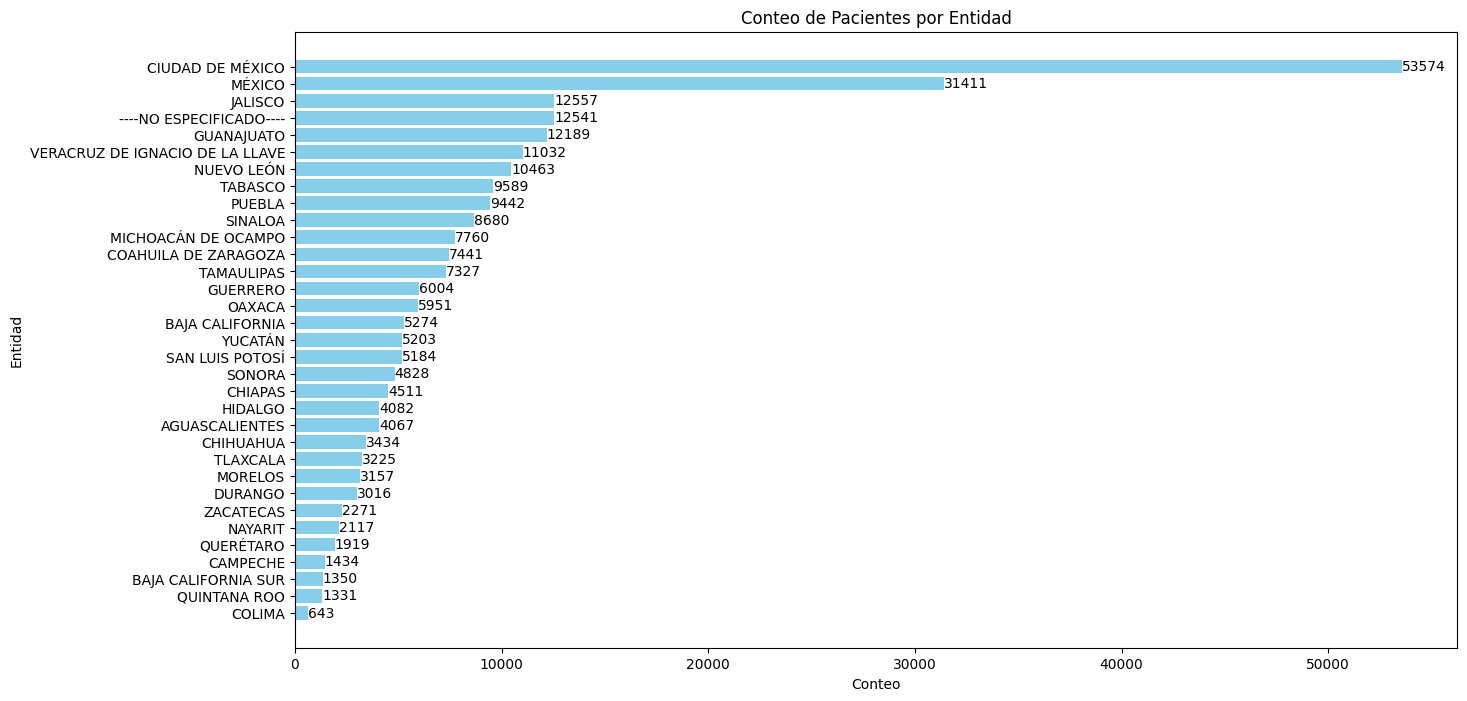

In [629]:
data = df_entidad.copy()
data.sort_values(by='cant_pacientes', inplace=True)
keys = data['ENTIDAD']
values = data['cant_pacientes']

# Creating the horizontal bar plot
plt.figure(figsize=(15, 8))
bars = plt.barh(keys, values, color='skyblue')

# Adding labels next to each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width()}', va='center')

# Adding title and labels
plt.title('Conteo de Pacientes por Entidad')
plt.xlabel('Conteo')
plt.ylabel('Entidad')

# Display the plot
plt.show()

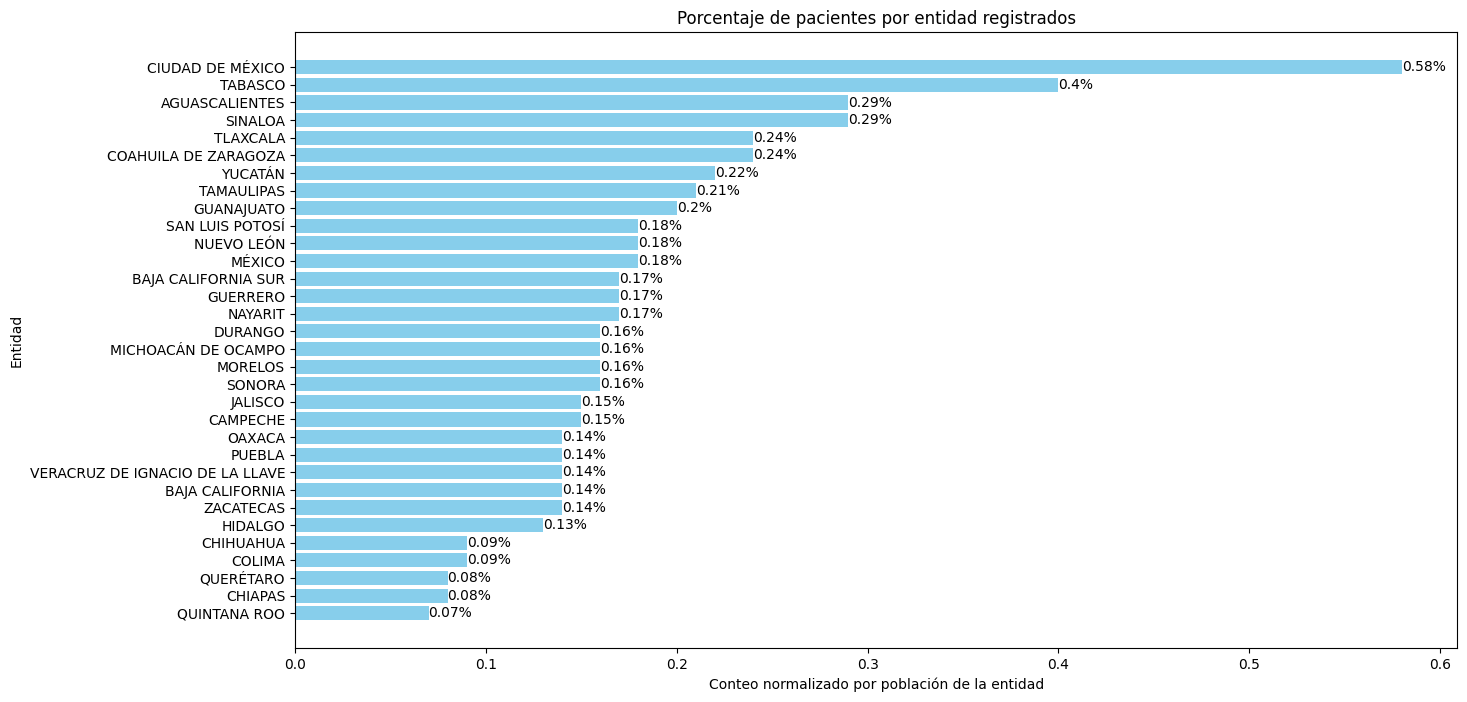

In [633]:
data = df_entidad.copy()
data.drop([32], inplace=True)
data.sort_values(by='cant_pacientes_normalizada', inplace=True)
keys = data['ENTIDAD']
values = data['cant_pacientes_normalizada']

# Creating the horizontal bar plot
plt.figure(figsize=(15, 8))
bars = plt.barh(keys, values, color='skyblue')

# Adding labels next to each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width()}%', va='center')

# Adding title and labels
plt.title('Porcentaje de pacientes por entidad registrados')
plt.xlabel('Conteo normalizado por población de la entidad')
plt.ylabel('Entidad')

# Display the plot
plt.show()

### ORIGEN - USMER o fuera de USMER (Unidades Monitoras de Enfermedades RespiratoriaS)

In [729]:
df_clean['ORIGEN'].value_counts()

2    167217
1     95790
Name: ORIGEN, dtype: int64

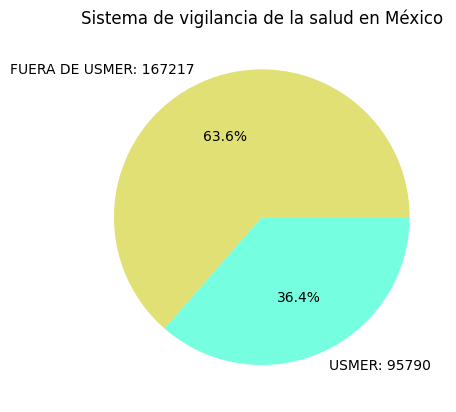

In [731]:
tipo_paciente = {
    1: "USMER",
    2: "FUERA DE USMER",
}
origen_value_counts = pd.Series([tipo_paciente[item] for item in df_clean['ORIGEN']]).value_counts()

plt.pie(origen_value_counts,
        labels = ['FUERA DE USMER: ' + str(origen_value_counts[0]),
                  'USMER: ' + str(origen_value_counts[1])],
        colors = [(0.8, .8, .1, 0.6), (0.1, 1, .8, 0.6)],
        autopct='%1.1f%%')
plt.title('Sistema de vigilancia de la salud en México');

### SECTOR - Institución de Salud que proporcionó el cuidado al paciente

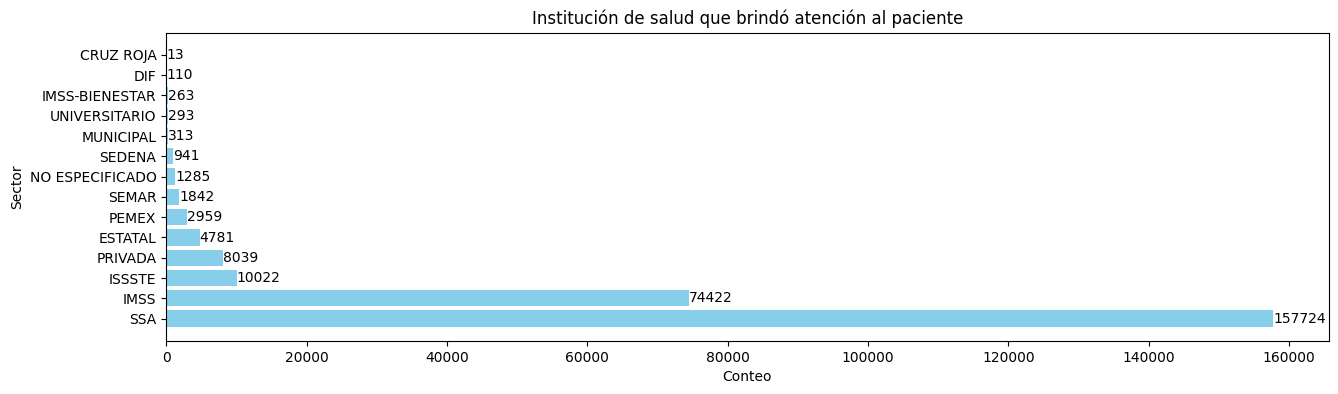

In [475]:
SECTOR = {
    1: "CRUZ ROJA",
    2: "DIF",
    3: "ESTATAL",
    4: "IMSS",
    5: "IMSS-BIENESTAR",
    6: "ISSSTE",
    7: "MUNICIPAL",
    8: "PEMEX",
    9: "PRIVADA",
    10: "SEDENA",
    11: "SEMAR",
    12: "SSA",
    13: "UNIVERSITARIO",
    99: "NO ESPECIFICADO"
}
sector_value_counts = pd.Series([SECTOR[item] for item in df_clean['SECTOR']]).value_counts()


# Using value_counts
value_counts = sector_value_counts

# Extracting keys (unique values) and values (counts)
keys = value_counts.index.tolist()
values = value_counts.values.tolist()

# Creating the horizontal bar plot
plt.figure(figsize=(15, 4))
bars = plt.barh(keys, values, color='skyblue')

# Adding labels next to each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width()}', va='center')

# Adding title and labels
plt.title('Institución de salud que brindó atención al paciente')
plt.xlabel('Conteo')
plt.ylabel('Sector')

# Display the plot
plt.show()

### SEXO - Sexo del paciente

In [727]:
df_clean['SEXO'].value_counts()

2    134313
1    128694
Name: SEXO, dtype: int64

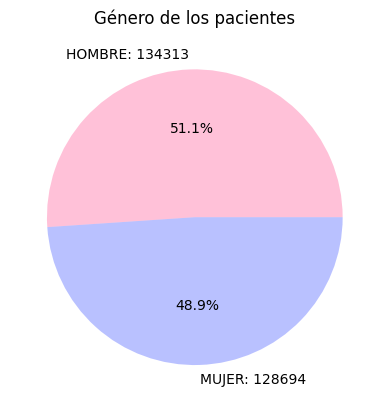

In [728]:
SEXO = {
    1: "MUJER",
    2: "HOMBRE",
    3: "NO ESPECIFICADO",
}
sexo_value_counts = pd.Series([SEXO[item] for item in df_clean['SEXO']]).value_counts()

plt.pie(sexo_value_counts,
        labels = ['HOMBRE: ' + str(sexo_value_counts[0]),
                  'MUJER: ' + str(sexo_value_counts[1])],
        colors = [(1, 0.2, 0.5, 0.3),(0.1, 0.2, 1, 0.3)],
        autopct='%1.1f%%')
plt.title('Género de los pacientes');

### TIPO_PACIENTE - Indica si el paciente tuvo que ser hospitalizado o si fue ambulatorio

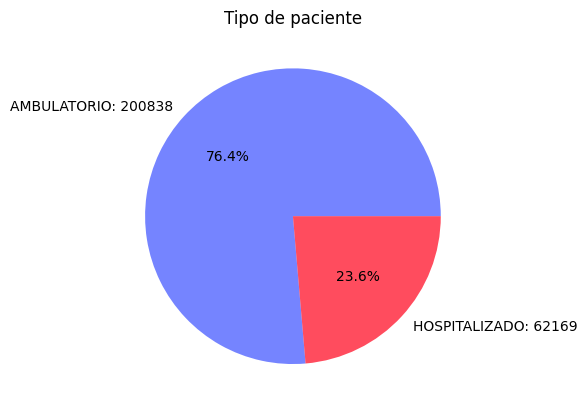

In [511]:
tipo_paciente = {
    1: "AMBULATORIO",
    2: "HOSPITALIZADO",
}
tipo_paciente_value_counts = pd.Series([tipo_paciente[item] for item in df_clean['TIPO_PACIENTE']]).value_counts()

plt.pie(tipo_paciente_value_counts,
        labels = ['AMBULATORIO: ' + str(tipo_paciente_value_counts[0]),
                  'HOSPITALIZADO: ' + str(tipo_paciente_value_counts[1])],
        colors = [(0.1, 0.2, 1, 0.6), (1, 0.0, 0.1, 0.7)],
        autopct='%1.1f%%')
plt.title('Tipo de paciente');

### INTUBADO

In [722]:
df_clean['INTUBADO'].value_counts()

97    200838
2      58247
1       3884
99        38
Name: INTUBADO, dtype: int64

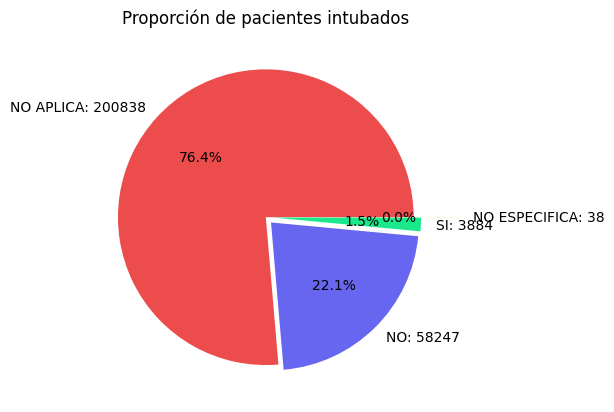

In [724]:
dictionary = {
    1: "SI",
    2: "NO",
    97: "NO APLICA",
    99: "NO ESPECIFICA"
}
value_counts = pd.Series([dictionary[item] for item in df_clean['INTUBADO']]).value_counts()

plt.pie(value_counts,
        labels = ['NO APLICA: ' + str(value_counts[0]),
                  'NO: ' + str(value_counts[1]),
                  'SI: ' + str(value_counts[2]),
                  'NO ESPECIFICA: ' + str(value_counts[3]),],
        explode=(0.0,0.05,0.05,0.3),
        colors = [(0.9, 0.0, .0, 0.7), (0, 0.0, 0.9, 0.6), (0.0, 0.9, .5, 0.9), (0.9, 0.9, .0, 1)],
        autopct='%1.1f%%')
plt.title('Proporción de pacientes intubados');

### NEUMONIA

In [683]:
df_clean['NEUMONIA'].value_counts()

2     220341
1      42652
99        14
Name: NEUMONIA, dtype: int64

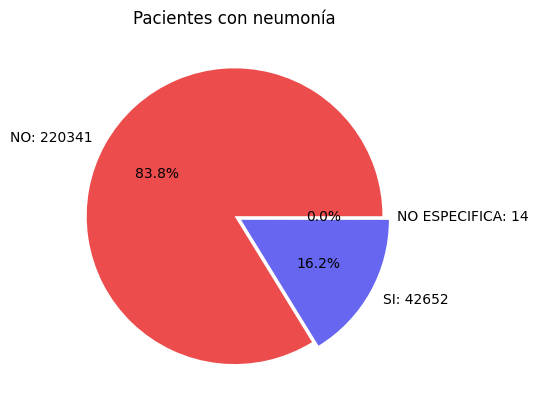

In [721]:
dictionary = {
    1: "SI",
    2: "NO",
    99: "NO ESPECIFICA"
}
value_counts = pd.Series([dictionary[item] for item in df_clean['NEUMONIA']]).value_counts()

plt.pie(value_counts,
        labels = ['NO: ' + str(value_counts[0]),
                  'SI: ' + str(value_counts[1]),
                  'NO ESPECIFICA: ' + str(value_counts[2])],
        explode=(0.0,0.05,0.0),
        colors = [(0.9, 0.0, .0, 0.7), (0, 0.0, 0.9, 0.6), (0.0, 0.9, .5, 0.9)],
        autopct='%1.1f%%')
plt.title('Pacientes con neumonía');

### NACIONALIDAD

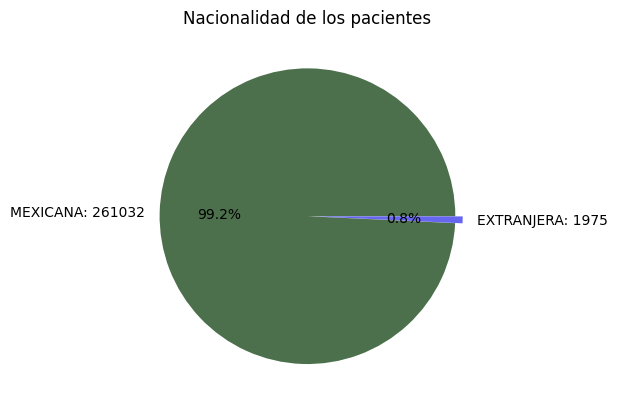

In [703]:
dictionary = {
    1: "MEXICANA",
    2: "EXTRANJERA",
}
value_counts = pd.Series([dictionary[item] for item in df_clean['NACIONALIDAD']]).value_counts()

plt.pie(value_counts,
        labels = ['MEXICANA: ' + str(value_counts[0]),
                  'EXTRANJERA: ' + str(value_counts[1]),],
        explode=(0.0,0.05),
        colors = [(0.0, 0.2, .0, 0.7), (0, 0.0, 0.9, 0.6)],
        autopct='%1.1f%%')
plt.title('Nacionalidad de los pacientes');

### EMBARAZO

In [710]:
data = df_clean[(df_clean['EMBARAZO'] == 1) | (df_clean['EMBARAZO'] == 2)].copy()
data['EMBARAZO'].value_counts()

2    126077
1      2064
Name: EMBARAZO, dtype: int64

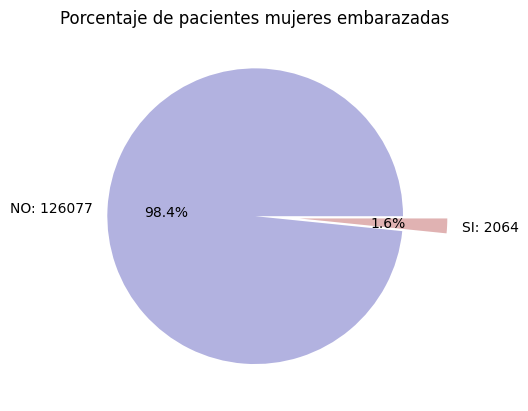

In [719]:
data = df_clean[(df_clean['EMBARAZO'] == 1) | (df_clean['EMBARAZO'] == 2)].copy()
value_counts = pd.Series([dictionary[item] for item in data['EMBARAZO']]).value_counts()

plt.pie(value_counts,
        labels = ['NO: ' + str(value_counts[0]),
                  'SI: ' + str(value_counts[1]),],
        explode=(0.0,0.3),
        colors = [(0.0, 0.0, .6, 0.3), (.6, 0.0, 0.0, 0.3)],
        autopct='%1.1f%%')
plt.title('Porcentaje de pacientes mujeres embarazadas');

### Lengua indígena

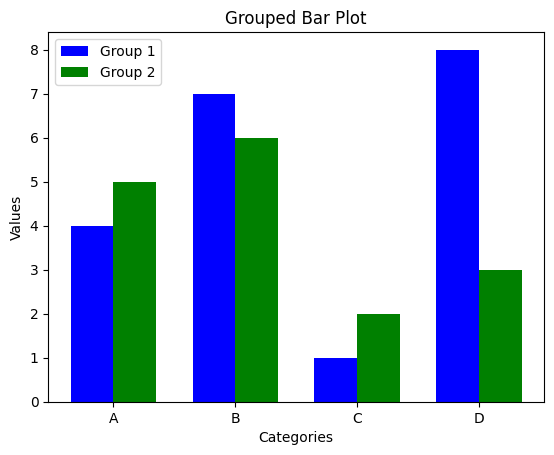

In [437]:

# Sample data
categories = ['A', 'B', 'C', 'D']
values1 = [4, 7, 1, 8]
values2 = [5, 6, 2, 3]

# Define the position of bars
bar_width = 0.35
index = np.arange(len(categories))

# Creating the bar plot
fig, ax = plt.subplots()
bar1 = ax.bar(index, values1, bar_width, label='Group 1', color='blue')
bar2 = ax.bar(index + bar_width, values2, bar_width, label='Group 2', color='green')

# Adding title and labels
plt.title('Grouped Bar Plot')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.xticks(index + bar_width / 2, categories)

# Adding legend
plt.legend()

# Display the plot
plt.show()

## Análisis de correlación
Puede proporcionar información sobre posibles predicores importantes para un análisis posterior.

## Análisis de distribución de variables
Examina la distribución de las variables en los datos para detectar sesgos o asimetrías.

## Identificación de valores atípicos
Detectar y analizar outliers y anomalías

## Segmentación
Dividir los datos en segmentos o grupos con características similares para analizar patrones específicos en elgrrupo. 

## Exploración de series temporales
Si los datos tienen una dimensión temporal, realizar un análisis de series temporales para identificar tendencias, estacionalidades, y ciclos en los datos a lo largo del tiempo.

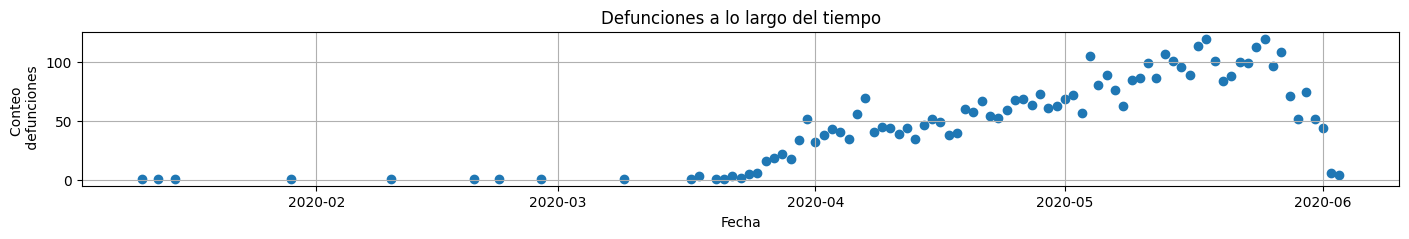

In [85]:
plt.figure(figsize=(17,2))
fechas_defunciones = list(dict(fecha_def.value_counts()).keys())
conteo_defunciones = list(dict(fecha_def.value_counts()).values())
plt.scatter(fechas_defunciones, conteo_defunciones)
plt.grid()
plt.title('Defunciones a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Conteo \n defunciones')
plt.show()

# Modelado de datos